<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
output_path = "survey-results-public.sqlite"

urllib.request.urlretrieve(url, output_path)
print("Download complete.")


Download complete.


#### 2. Connect to the Database


**Install the needed libraries**


In [5]:
!pip install pandas

In [6]:
!pip install matplotlib

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


In [34]:
# Saving survey-results-public.sqlite db as csv file for future needs

import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# List available tables (optional)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

# Choose the table you're interested in, e.g., 'main' or another
table_name = 'main'  # replace with the actual table name

# Load the table into a DataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Save the DataFrame as a CSV file
df.to_csv('survey_results_public.csv', index=False)

   name
0  main


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [23]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [26]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [29]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [36]:
# Load actual data from the table into a real DataFrame
df = pd.read_sql_query("SELECT * FROM main", conn)

# Now df is a proper pandas DataFrame with rows and columns
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


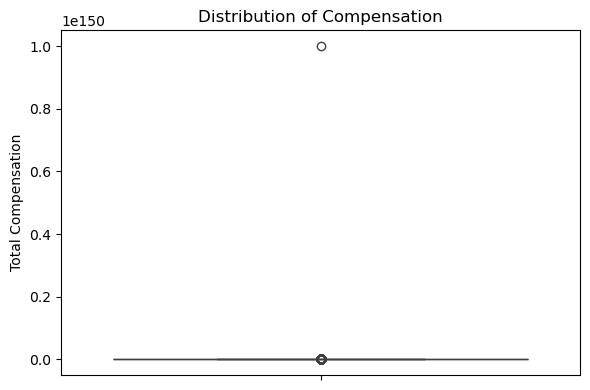

In [46]:
# Basic box plot for just one variable
import seaborn as sns
import numpy as np


plt.figure(figsize=(6, 4))
sns.boxplot(y='CompTotal', data=df)  # y-axis only since there's no category

# Add labels and title
plt.title('Distribution of Compensation')
plt.ylabel('Total Compensation')

# Show plot
plt.tight_layout()
plt.show()

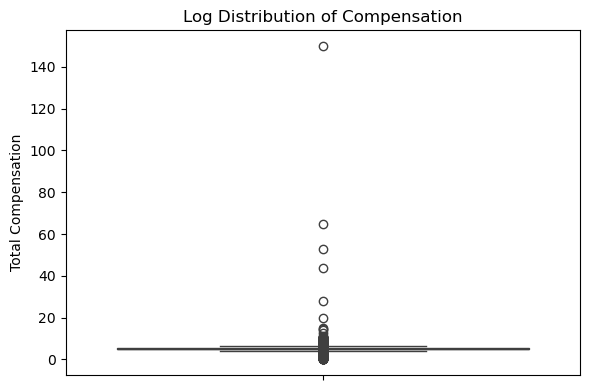

In [54]:
# Optional: log-transform to reduce skewness


df['CompTotal_log'] = df['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


plt.figure(figsize=(6, 4))
sns.boxplot(y='CompTotal_log', data=df)  # y-axis only since there's no category

# Add labels and title
plt.title('Log Distribution of Compensation')
plt.ylabel('Total Compensation')

# Show plot
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


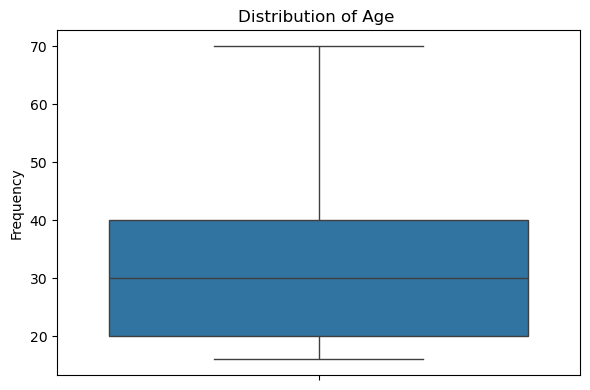

In [56]:
# your code goes here
# Drop rows with missing values in key columns
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)

plt.figure(figsize=(6, 4))
sns.boxplot(y='AgeNumeric', data=df)  # y-axis only since there's no category

# Add labels and title
plt.title('Distribution of Age ')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


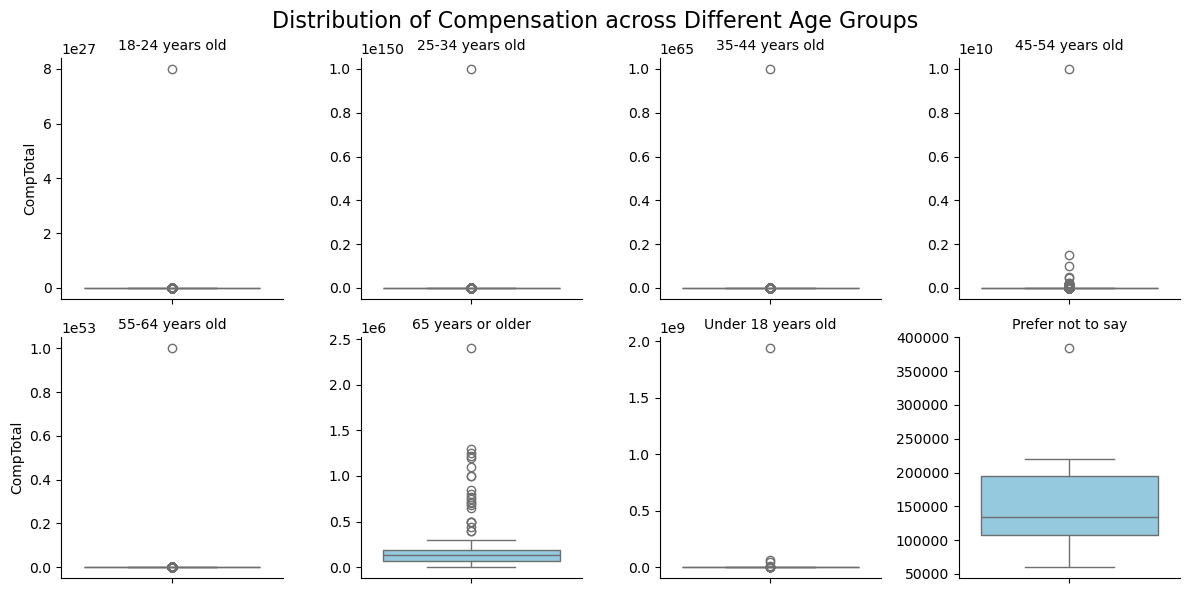

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['CompTotal', 'Age'])

# Create FacetGrid
g = sns.FacetGrid(df_clean, col="Age", col_wrap=4, sharex=False, sharey=False)

# Use map_dataframe for flexibility
g.map_dataframe(sns.boxplot, y='CompTotal', color='skyblue')

# Titles and layout
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Compensation across Different Age Groups", fontsize=16)

plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [80]:
# your code goes here

df['JobSatPoints_6'].value_counts()

JobSatPoints_6
0.00     7912
20.00    4352
10.00    3328
30.00    2482
15.00    1466
         ... 
73.00       1
6.25        1
57.00       1
61.00       1
63.00       1
Name: count, Length: 93, dtype: int64

In [92]:
df['CompTotal'].value_counts()

CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
59800.0       1
28805.0       1
377532.0      1
518400.0      1
77700.0       1
Name: count, Length: 3337, dtype: int64

C:\Users\serge\AppData\Local\Temp\ipykernel_4936\1751682008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CompTotal'] = pd.to_numeric(df_clean['CompTotal'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\1751682008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\1751682008.py:13: SettingWithCopyWarning: 
A value is trying to be set o

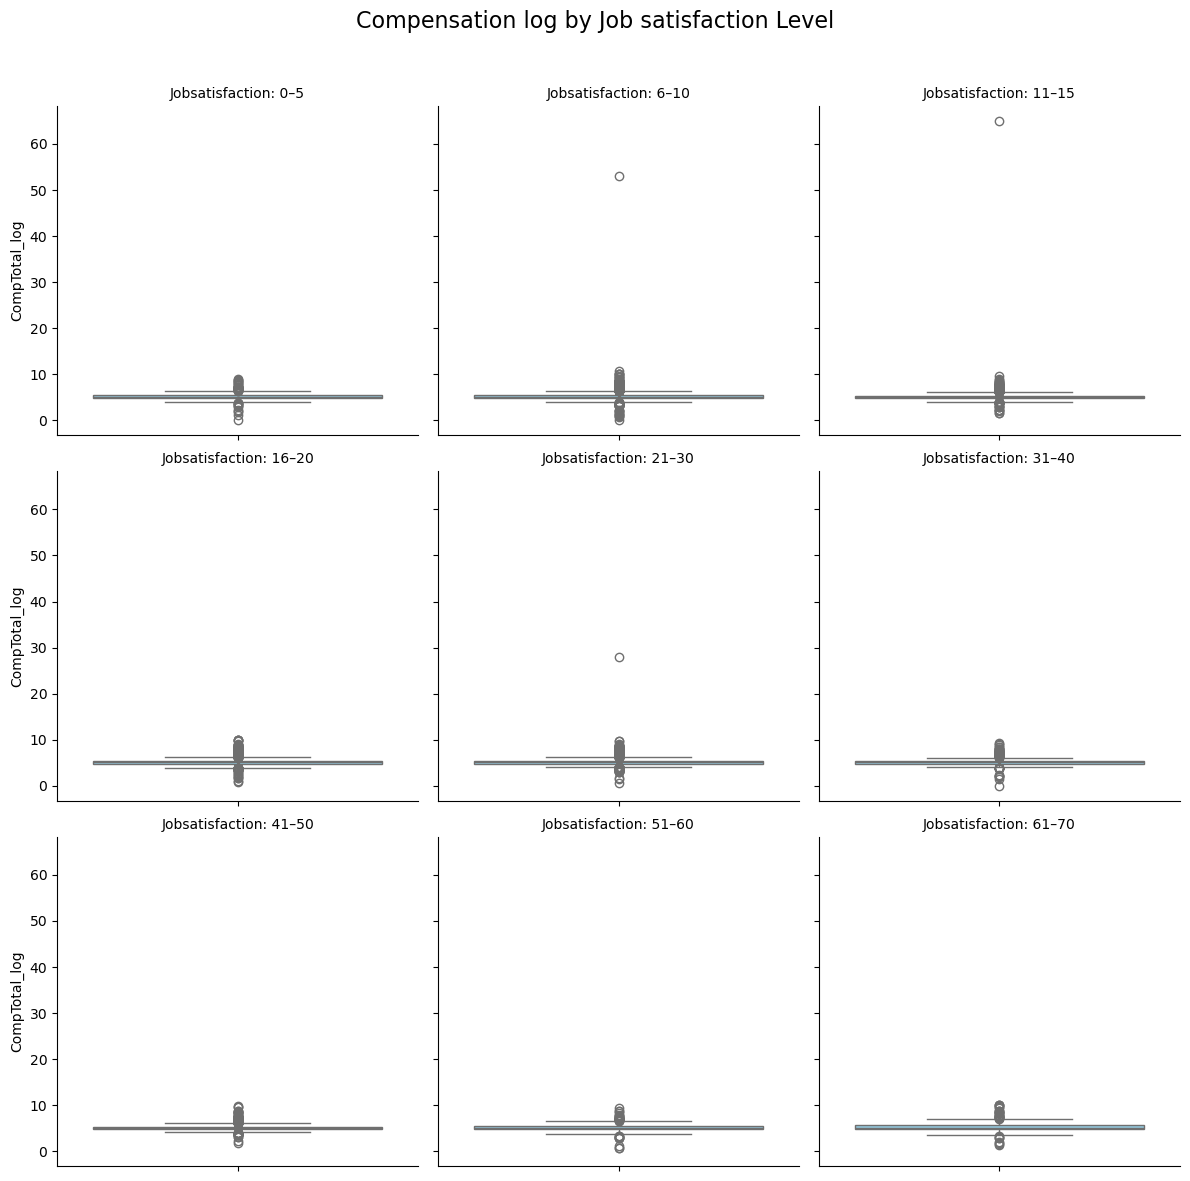

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
df_clean = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Ensure numeric type
df_clean['CompTotal'] = pd.to_numeric(df_clean['CompTotal'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Add log-transformed column
df_clean['CompTotal_log'] = df_clean['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Optional: Bin experience into ranges (like 0–5, 6–10, etc.)
df_clean['JobSatPoints_6_Bin'] = pd.cut(df_clean['JobSatPoints_6'], bins=[0, 5, 10, 15, 20, 30, 40, 50, 60, 70], labels=['0–5', '6–10', '11–15', '16–20',
        '21–30', '31–40', '41–50', '51–60', '61–70'])

# Plot: Histogram of JobSat per ExperienceBin
g = sns.FacetGrid(df_clean, col='JobSatPoints_6_Bin', col_wrap=3, height=4, sharex=True, sharey=True)
# g.map(sns.histplot, 'CompTotal', bins=10, color='skyblue', kde=True)
g.map_dataframe(sns.boxplot, y='CompTotal_log', color='skyblue')
# Title and layout
g.set_titles(col_template="Jobsatisfaction: {col_name}")
g.fig.suptitle("Compensation log by Job satisfaction Level", fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


In [120]:
top_5 = df['MainBranch'].value_counts().head(5)
top_5

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

MainBranch counts after cleaning:
 MainBranch
I am a developer by profession                                                           21549
I am not primarily a developer, but I write code sometimes as part of my work/studies     1886
Name: count, dtype: int64
Top 5 usable branches: ['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes as part of my work/studies']


C:\Users\serge\AppData\Local\Temp\ipykernel_4936\2000678444.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ConvertedCompYearly_log'] = df_clean['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


MainBranch
I am a developer by \nprofession                                                                 21549
I am not primarily a\n developer, but I wr\nite code sometimes a\ns part of my work/st\nudies     1886
Name: count, dtype: int64


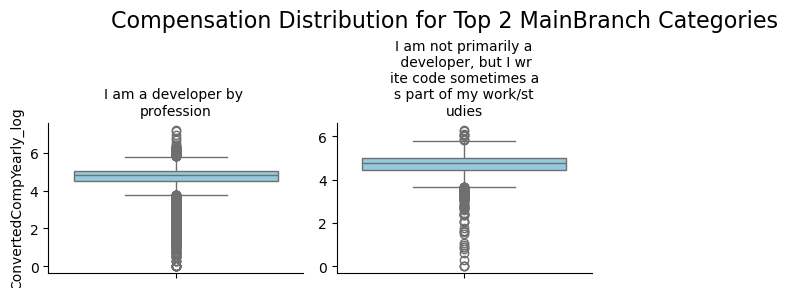

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure ConvertedCompYearly is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop missing values for both columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'MainBranch'])

# Check which MainBranch values remain and their counts
mainbranch_counts = df_clean['MainBranch'].value_counts()
print("MainBranch counts after cleaning:\n", mainbranch_counts)

# Add log-transformed column
df_clean['ConvertedCompYearly_log'] = df_clean['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Get top 5 branches based on actual usable data
top_5_branches = mainbranch_counts.head(5).index.tolist()
print("Top 5 usable branches:", top_5_branches)

# Filter DataFrame to include only top 5
df_top5 = df_clean[df_clean['MainBranch'].isin(top_5_branches)]
df_top5['MainBranch'] = df_top5['MainBranch'].apply(lambda x: '\n'.join(x[i:i+20] for i in range(0, len(x), 20)))

# Final check: ensure each of the top 5 has valid data
print(df_top5['MainBranch'].value_counts())

# Plot FacetGrid of boxplots by MainBranch
g = sns.FacetGrid(df_top5, col="MainBranch", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, y='ConvertedCompYearly_log', color='skyblue')

# Final layout tweaks
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.6)
plt.subplots_adjust(bottom=0.1)
g.fig.suptitle("Compensation Distribution for Top 2 MainBranch Categories", fontsize=16)

plt.show()


Analyze compensation across the top 5 developer roles.


In [ ]:
# your code goes here

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


Top 5 usable branches: ['United States of America', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine', 'India']
Country
United States of Ame\nrica                                  7042
Germany                                                     3004
United Kingdom of Gr\neat Britain and Nort\nhern Ireland    2008
Ukraine                                                     1610
India                                                       1551
Name: count, dtype: int64


C:\Users\serge\AppData\Local\Temp\ipykernel_4936\3536661217.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CompTotal_log'] = df_clean['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\3536661217.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Country'] = df_top5['Country'].apply(lambda x: '\n'.join(x[i:i+20] for i in range(0, len(x), 20)))


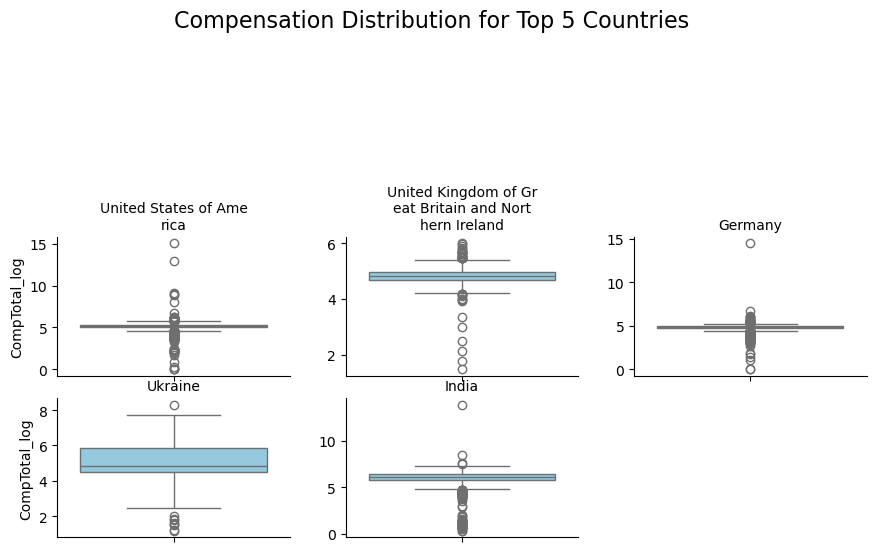

In [175]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure ConvertedCompYearly is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing values for both columns
df_clean = df.dropna(subset=['CompTotal', 'Country'])

# Check which MainBranch values remain and their counts
Country_counts = df_clean['Country'].value_counts()
# print(Country counts after cleaning:\n", Country_counts)

# Get top 5 branches based on actual usable data
top_5_branches = Country_counts.head(5).index.tolist()
print("Top 5 usable branches:", top_5_branches)

# Add log-transformed column
df_clean['CompTotal_log'] = df_clean['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


# Filter DataFrame to include only top 5
df_top5 = df_clean[df_clean['Country'].isin(top_5_branches)]
df_top5['Country'] = df_top5['Country'].apply(lambda x: '\n'.join(x[i:i+20] for i in range(0, len(x), 20)))

# Final check: ensure each of the top 5 has valid data
print(df_top5['Country'].value_counts())

# Plot FacetGrid of boxplots by MainBranch
g = sns.FacetGrid(df_top5, col="Country", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, y='CompTotal_log', color='skyblue')

# Final layout tweaks
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.6)
plt.subplots_adjust(bottom=0.1)
g.fig.suptitle("Compensation Distribution for Top 5 Countries", fontsize=16)

plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


Top 5 usable branches: ['Employed, full-time', 'Independent contractor, freelancer, or self-employed', 'Employed, full-time;Independent contractor, freelancer, or self-employed', 'Employed, part-time', 'Employed, full-time;Student, part-time']


C:\Users\serge\AppData\Local\Temp\ipykernel_4936\1793614677.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Employment'] = df_top5['Employment'].apply(lambda x: '\n'.join(x[i:i+20] for i in range(0, len(x), 20)))
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\1793614677.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CompTotal_log'] = df_clean['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


Employment
Employed, full-time                                                               25309
Independent contract\nor, freelancer, or s\nelf-employed                           2470
Employed, full-time;\nIndependent contract\nor, freelancer, or s\nelf-employed     2424
Employed, part-time                                                                 624
Employed, full-time;\nStudent, part-time                                            525
Name: count, dtype: int64


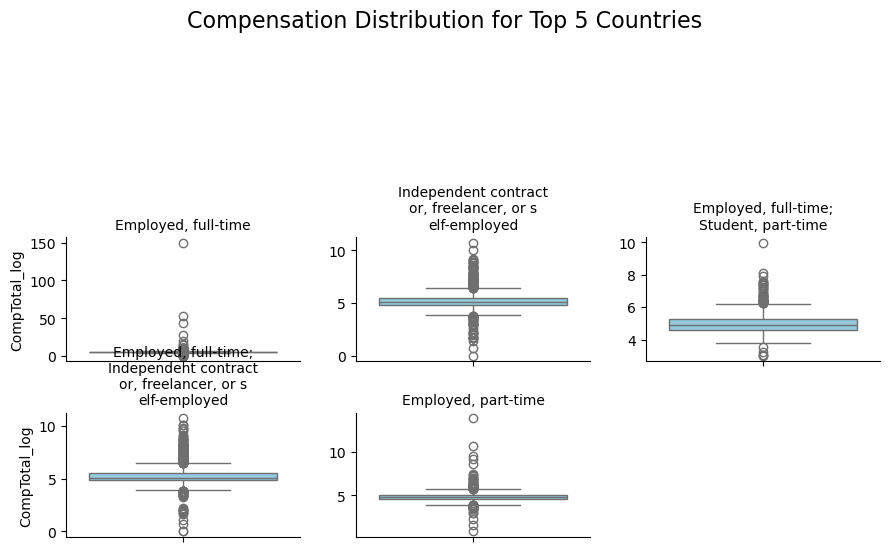

In [177]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure ConvertedCompYearly is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing values for both columns
df_clean = df.dropna(subset=['CompTotal', 'Employment'])

# Check which MainBranch values remain and their counts
Country_counts = df_clean['Employment'].value_counts()
# print(Country counts after cleaning:\n", Country_counts)

# Get top 5 branches based on actual usable data
top_5_branches = Country_counts.head(5).index.tolist()
print("Top 5 usable branches:", top_5_branches)

# Filter DataFrame to include only top 5
df_top5 = df_clean[df_clean['Employment'].isin(top_5_branches)]
df_top5['Employment'] = df_top5['Employment'].apply(lambda x: '\n'.join(x[i:i+20] for i in range(0, len(x), 20)))

# Add log-transformed column
df_clean['CompTotal_log'] = df_clean['CompTotal'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Final check: ensure each of the top 5 has valid data
print(df_top5['Employment'].value_counts())

# Plot FacetGrid of boxplots by MainBranch
g = sns.FacetGrid(df_top5, col="Employment", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, y='CompTotal_log', color='skyblue')

# Final layout tweaks
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.6)
plt.subplots_adjust(bottom=0.1)
g.fig.suptitle("Compensation Distribution for Top 5 Countries", fontsize=16)

plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


C:\Users\serge\AppData\Local\Temp\ipykernel_4936\2173068220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\2173068220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
C:\Users\serge\AppData\Local\Temp\ipykernel_4936\2173068220.py:13: SettingWithCopyWarning: 
A value is trying to be

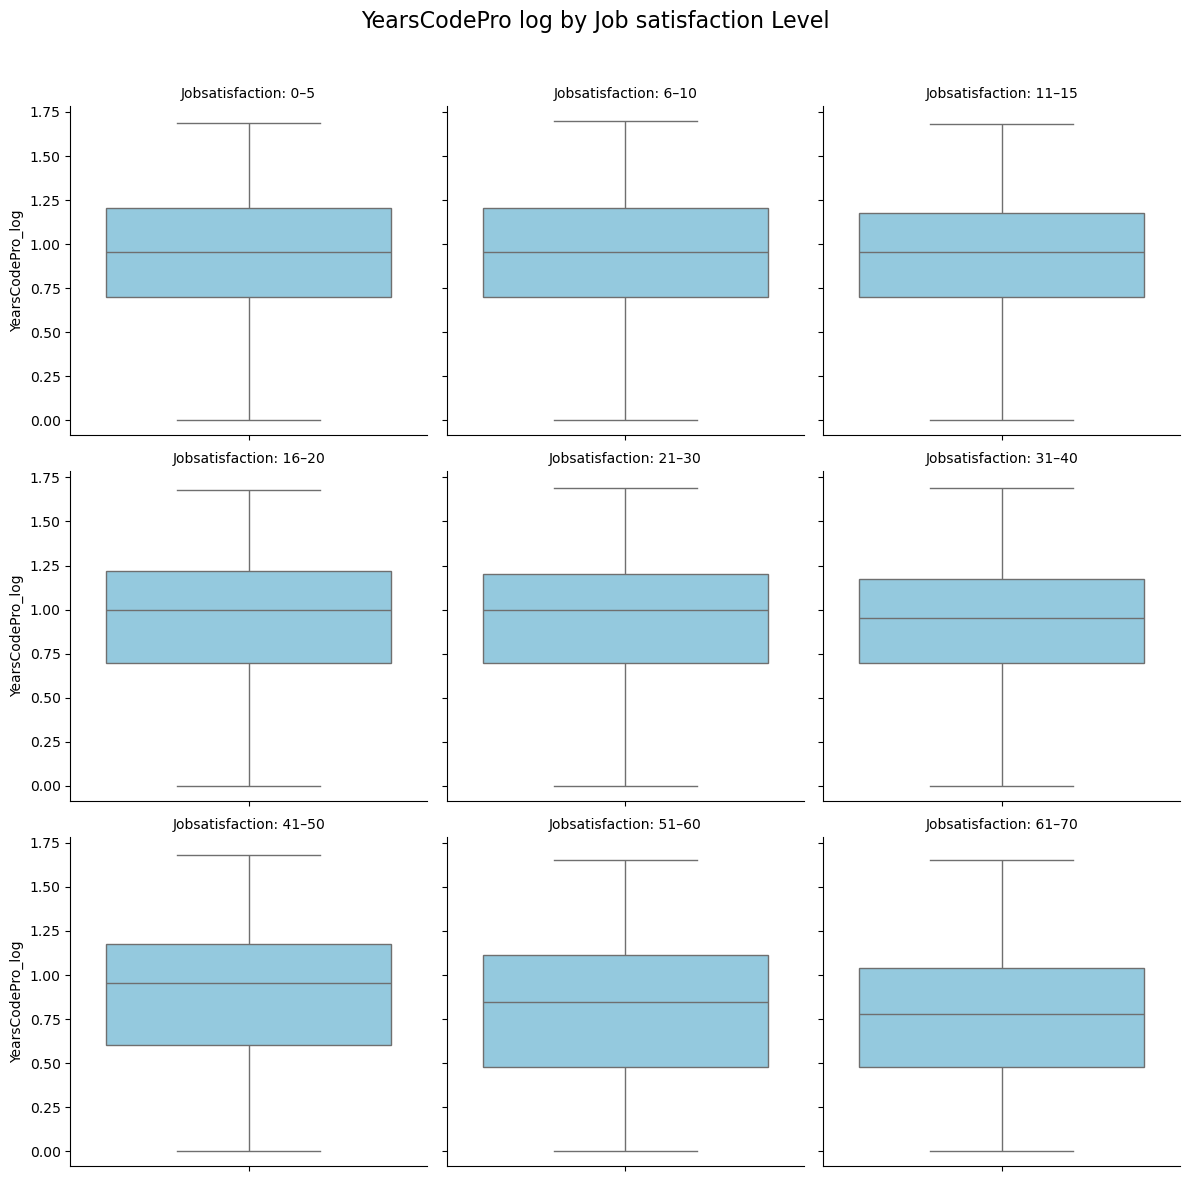

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Ensure numeric type
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Add log-transformed column
df_clean['YearsCodePro_log'] = df_clean['YearsCodePro'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Optional: Bin experience into ranges (like 0–5, 6–10, etc.)
df_clean['JobSatPoints_6_Bin'] = pd.cut(df_clean['JobSatPoints_6'], bins=[0, 5, 10, 15, 20, 30, 40, 50, 60, 70], labels=['0–5', '6–10', '11–15', '16–20',
        '21–30', '31–40', '41–50', '51–60', '61–70'])

# Plot: Histogram of JobSat per ExperienceBin
g = sns.FacetGrid(df_clean, col='JobSatPoints_6_Bin', col_wrap=3, height=4, sharex=True, sharey=True)
# g.map(sns.histplot, 'CompTotal', bins=10, color='skyblue', kde=True)
g.map_dataframe(sns.boxplot, y='YearsCodePro_log', color='skyblue')
# Title and layout
g.set_titles(col_template="Jobsatisfaction: {col_name}")
g.fig.suptitle("YearsCodePro log by Job satisfaction Level", fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [171]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
